Here we will focus on a single classification problem: predicting penguins' sex. <br> First, let's choose two numeric features to use for this task. Produce a scatterplot that would be helpful to do this, and choose two numeric features which look like they would be good predictors.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

penguins_df = sns.load_dataset('penguins')

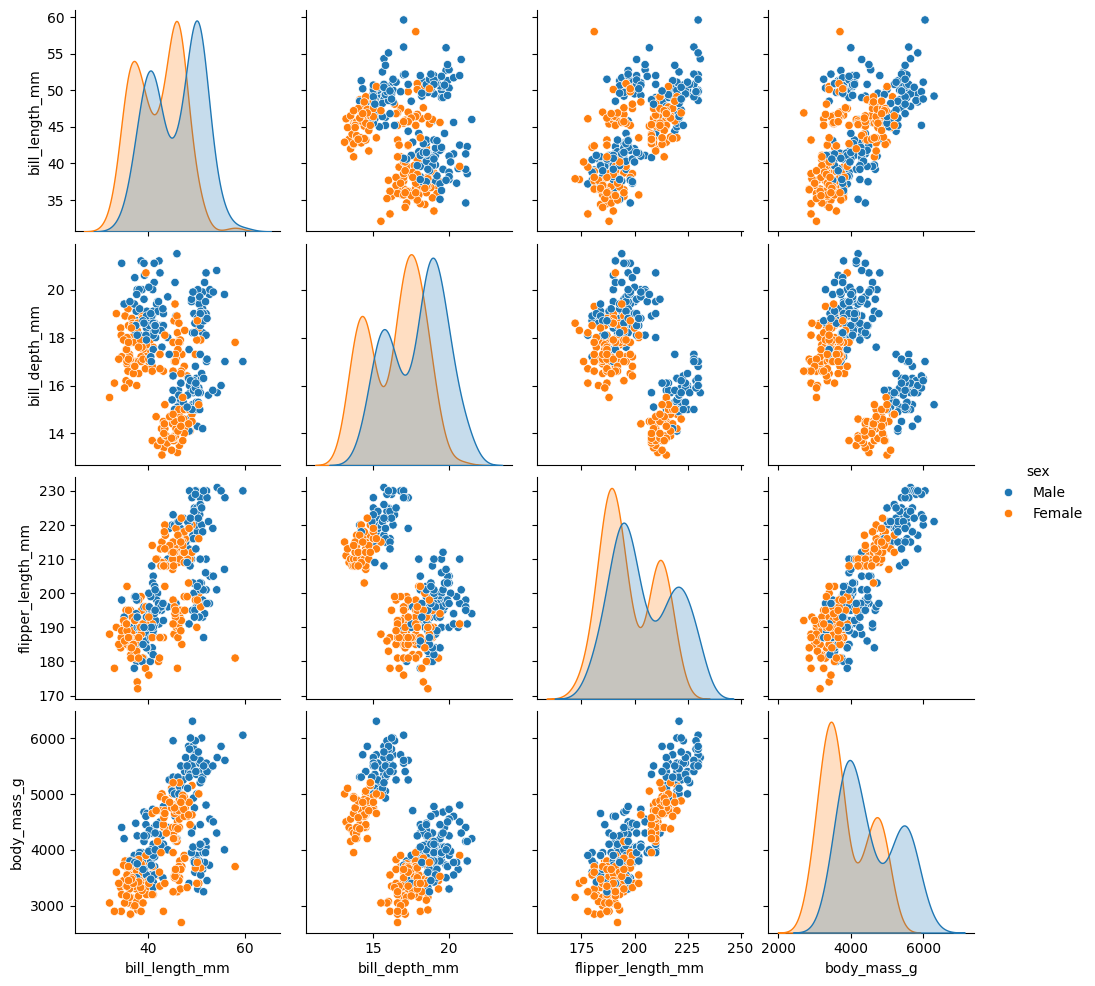

In [2]:
sns.pairplot(penguins_df, hue='sex')

In [3]:
two_chosen_numeric_features = ['bill_depth_mm', 'body_mass_g']

Now, let's predict sex using a Logistic Regression model.

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np

target_column = 'sex'
model_data = penguins_df[two_chosen_numeric_features + [target_column]]

# Recode the target column to be 0/1, where 1 indicates that the penguin is 'female'
model_data['sex'] = model_data['sex'].apply(lambda x: np.nan if pd.isna(x) else x == 'Female')

#  Drop the data which has a missing target variable
model_data = model_data[~model_data[target_column].isna()]

#  We don't want to drop observations with missing features
#  Instead, we're going to impute values and add an indicator that the original
#  data was missing

#  Create variables for each feature which indicate whether any of the features are missing
#  Rename them so the columns end in "_is_na"
na_indicators =  model_data[two_chosen_numeric_features].isna().rename(lambda x: f'{x}_isna', axis=1) # SOLUTION
model_data = pd.concat((model_data, na_indicators), axis=1)

#  Impute the mean for missing data
model_data = model_data.fillna(model_data.mean())

<ipython-input-23-2f6cdfa2a779>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['sex'] = model_data['sex'].apply(lambda x: np.nan if pd.isna(x) else x == 'Female')
<ipython-input-23-2f6cdfa2a779>:25: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  model_data = model_data.fillna(model_data.mean())


In [27]:
#  Split the data test/train
X_train, X_test, y_train, y_test = train_test_split(
    model_data[two_chosen_numeric_features],
    model_data[target_column],
    test_size=0.2, random_state=42,
)

In [39]:
# By default, sklearn's LogisticRegression uses L2 regularization, turn this off by passing penalty=None
model = LogisticRegression(penalty= None)
model.fit(X_train, y_train)
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)


print(f"Train Predictions: {y_train_hat}")
print(f"Test Predictions: {y_test_hat}")

Train Predictions: [ True  True False False False False  True  True False False False  True
 False  True False  True False False  True False  True False  True False
 False False False False  True False False False False  True False  True
  True False  True False False  True False  True  True  True False False
  True  True  True  True  True False  True  True False  True  True  True
 False False  True  True False  True  True  True  True False False  True
  True False False  True  True  True False False False False  True False
  True  True False False False False  True  True  True False False False
  True  True False  True False False  True False False False  True  True
 False False  True  True False  True False False False False  True  True
  True False False  True False False  True False False  True False  True
  True  True False False False False False  True False False  True False
 False False  True False False  True  True False  True  True False  True
  True False False False False F

Now we're going to evaluate the performance of this model. Produce the confusion matrices for the test and train predictions, where each cell shows the proportion of the observations in that category. Does the model perform better on the test set or the train set?

Train Confusion Matrix:
[[0.46616541 0.05263158]
 [0.05639098 0.42481203]]


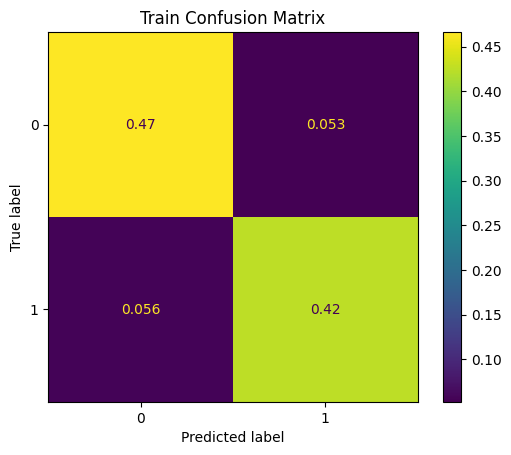

Test Confusion Matrix:
[[0.41791045 0.02985075]
 [0.05970149 0.49253731]]


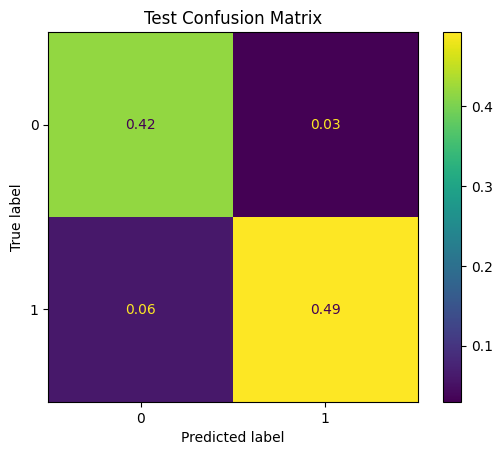

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Train Confusion Matrix
print("Train Confusion Matrix:")
train_cm = confusion_matrix(y_train, y_train_hat)
#  confusion_matrix() returns counts, turn into proportions
train_cm = train_cm / y_train.shape[0]
print(train_cm)
ConfusionMatrixDisplay(train_cm).plot()
plt.title("Train Confusion Matrix")
plt.show()

# Test Confusion Matrix
print("Test Confusion Matrix:")
test_cm = confusion_matrix(y_test, y_test_hat)
test_cm = test_cm / y_test.shape[0]
print(test_cm)
ConfusionMatrixDisplay(test_cm).plot()
plt.title("Test Confusion Matrix")
plt.show()

The model performs best on the test set, as expected: the numbers of true positives and true negatives are higher.

Now, calculate the following metrics: accuracy, false positive and false negative rates, precision and recall, and F1 score (some of these are implemented in sklearn.metrics, some you'll have to write yourself based on the confusion matrix).

We're going to be looking at these metrics again, so write a function which takes the true and labels as inputs and returns all of these values in a dictionary.

In [44]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

def evaluate_predictions(y_true, y_predicted):
    cm = confusion_matrix(y_true, y_predicted)
    TN = cm[0][0]
    FN = cm[1][0]
    FP = cm[0][1]
    TP = cm[1][1]

    N = FP + TN
    P = TP + FN

    return {
        'false_positive_rate': FP / N,
        'false_negative_rate': FN / P,
        'accuracy': accuracy_score(y_true, y_predicted),
        'precision': precision_score(y_true, y_predicted),
        'recall': recall_score(y_true, y_predicted),
        'f1': f1_score(y_true, y_predicted),
    }

evaluate_predictions(y_test, y_test_hat)


{'false_positive_rate': 0.06666666666666667,
 'false_negative_rate': 0.10810810810810811,
 'accuracy': 0.9104477611940298,
 'precision': 0.9428571428571428,
 'recall': 0.8918918918918919,
 'f1': 0.9166666666666666}

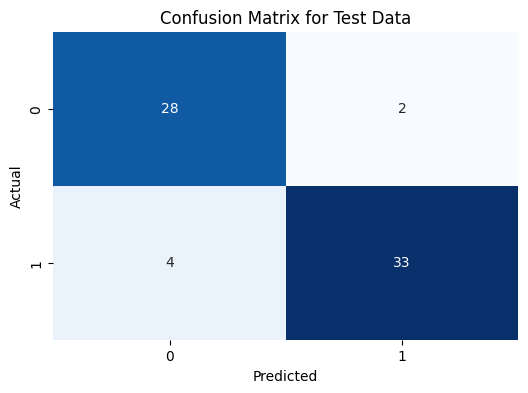

Classification Report for Test Data:

              precision    recall  f1-score   support

        Male       0.88      0.93      0.90        30
      Female       0.94      0.89      0.92        37

    accuracy                           0.91        67
   macro avg       0.91      0.91      0.91        67
weighted avg       0.91      0.91      0.91        67

Train Accuracy: 0.89
Test Accuracy: 0.91


In [45]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt

# 1. Perform predictions
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

# 2. Generate the confusion matrix (based on the test data)
cm = confusion_matrix(y_test, y_test_hat)

# 3. Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Test Data')
plt.show()

# 4. Print performance metrics (Accuracy, Precision, Recall, etc.))
print("Classification Report for Test Data:\n")
print(classification_report(y_test, y_test_hat, target_names=['Male', 'Female']))

# 5. Print accuracy scores
train_accuracy = accuracy_score(y_train, y_train_hat)
test_accuracy = accuracy_score(y_test, y_test_hat)

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
